## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('students-data.csv',sep=';')

## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [5]:
df.index.name = 'number'
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [6]:
df.select_dtypes(include='object').columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [7]:
#dropping dependent columns
df_ind = df.drop(['G1','G2','G3'],axis=1)

In [8]:
#dropping columns with variance less than 1
print(df_ind.drop(df_ind.var()[df_ind.var() < 1].index.values, axis=1,inplace=True))

None


In [9]:
df_ind.var()

age          1.628285
Medu         1.198445
Fedu         1.184180
goout        1.239388
Walc         1.658678
health       1.932944
absences    64.049541
dtype: float64

## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [10]:
print(df_ind.select_dtypes(include='object').columns)
print(df_ind.nunique())
print('I can see that some categorical columns such as Mjob, Fjob etc. has more than two distinct values, hence I will apply one-hot encoding for them and for rest of the columns I will use LabelEncoder')

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')
school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
goout          5
Walc           5
health         5
absences      34
dtype: int64
I can see that some categorical columns such as Mjob, Fjob etc. has more than two distinct values, hence I will apply one-hot encoding for them and for rest of the columns I will use LabelEncoder


In [11]:
#first doing LabelEncoding for categorical column having two distinct values
le = LabelEncoder()
df_ind_2class = df_ind[['school','sex','address','famsize','Pstatus','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']]
df_ind_2class_encoded = df_ind_2class.apply(le.fit_transform)

In [12]:
df_ind_2class_encoded.head()

,school,sex,address,famsize,Pstatus,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,
0,0,0,1,0,0,1,0,0,0,1,1,0,0
1,0,0,1,0,1,0,1,0,0,0,1,1,0
2,0,0,1,1,1,1,0,1,0,1,1,1,0
3,0,0,1,0,1,0,1,1,1,1,1,1,1
4,0,0,1,0,1,0,1,1,0,1,1,0,0


In [13]:
#now encoding categories with more than two distinct values
df_ind_multi_class = df_ind[['Mjob','Fjob','address','reason','guardian']]
df_ind_multi_class_encoded = pd.get_dummies(df_ind_multi_class)

In [14]:
df_ind_multi_class_encoded.head()

,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,address_R,address_U,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
number,,,,,,,,,,,,,,,,,,,
0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0
2,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0
3,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0
4,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0


In [15]:
df_ind_after_drop = df_ind #first assigning the dataframe with independent columns to a new variable
#droppping all the categorical column for which a separate encoding has been done
df_ind_after_drop = df_ind_after_drop.drop(['Mjob','Fjob','address','reason','guardian','school','sex','address','famsize','Pstatus','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic'],axis=1)
df_ind_after_drop.head()

,age,Medu,Fedu,goout,Walc,health,absences
number,,,,,,,
0,18,4,4,4,1,3,6
1,17,1,1,3,1,3,4
2,15,1,1,2,3,3,10
3,15,4,2,2,1,5,2
4,16,3,3,2,2,5,4


In [16]:
#first combining the two differently encoded dataframes
final_ind_dset = pd.merge(df_ind_2class_encoded, df_ind_multi_class_encoded, on = 'number')

In [17]:
#now combining the dataframe having the two differently encoded dataframes and the one which has non-categorical columns
final_ind_dset = pd.merge(df_ind_after_drop, final_ind_dset, on = 'number')
final_ind_dset.head()

,age,Medu,Fedu,goout,Walc,health,absences,school,sex,address,...,Fjob_teacher,address_R,address_U,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
number,,,,,,,,,,,,,,,,,,,,,
0,18,4,4,4,1,3,6,0,0,1,...,1,0,1,1,0,0,0,0,1,0
1,17,1,1,3,1,3,4,0,0,1,...,0,0,1,1,0,0,0,1,0,0
2,15,1,1,2,3,3,10,0,0,1,...,0,0,1,0,0,1,0,0,1,0
3,15,4,2,2,1,5,2,0,0,1,...,0,0,1,0,1,0,0,0,1,0
4,16,3,3,2,2,5,4,0,0,1,...,0,0,1,0,1,0,0,1,0,0


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [18]:
#taking dependent column to a separate dataframe
df_dep = df[['G1','G2','G3']]

#creating a function to return pass or fail based on the grade
def result_calculation(g1,g2,g3):
    if g1>=10 & g2>=10 & g3>=10:
        return 1    
    else:
        return 0

In [19]:
df_dep['result'] = df_dep.apply(lambda x: result_calculation(x['G1'],x['G2'],x['G3']),axis=1)
df = pd.merge(final_ind_dset, df_dep, on = 'number')
df.head()

C:\Users\sumans\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,age,Medu,Fedu,goout,Walc,health,absences,school,sex,address,...,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,G1,G2,G3,result
number,,,,,,,,,,,,,,,,,,,,,
0,18,4,4,4,1,3,6,0,0,1,...,0,0,0,0,1,0,5,6,6,0
1,17,1,1,3,1,3,4,0,0,1,...,0,0,0,1,0,0,5,5,6,0
2,15,1,1,2,3,3,10,0,0,1,...,0,1,0,0,1,0,7,8,10,0
3,15,4,2,2,1,5,2,0,0,1,...,1,0,0,0,1,0,15,14,15,1
4,16,3,3,2,2,5,4,0,0,1,...,1,0,0,1,0,0,6,10,10,0


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [20]:
X = df.drop('G3',axis=1)
y = df['G3']

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

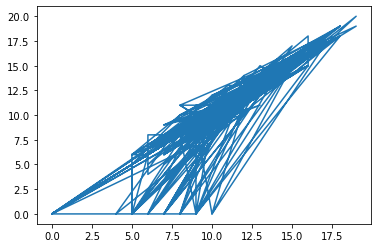

In [21]:
plt.plot(df['G2'],df['G3'])


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

In [22]:
student_cnt_per_school = df.groupby(['school']).size().reset_index(name='counts')
plt.plot(sturdent_cnt_per_school['school'],sturdent_cnt_per_school['counts'])

NameError: name 'sturdent_cnt_per_school' is not defined

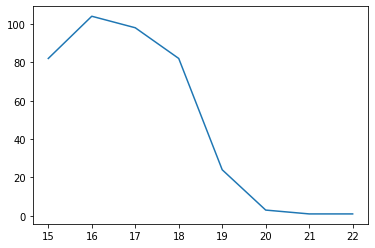

In [61]:
student_cnt_per_age = df.groupby(['age']).size().reset_index(name='counts')
plt.plot(student_cnt_per_age['age'],student_cnt_per_age['counts'])

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=300,random_state=1)
print(X_train.shape)
print(X_test.shape)

(300, 42)
(95, 42)


## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model = LogisticRegression()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

C:\Users\sumans\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sumans\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [29]:
model_score = model.score(X_test,y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_predict))
print(metrics.f1_score(y_test, y_predict, average='macro'))

0.2631578947368421
[[7 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 2 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 2 3 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 3 0 1 1 0 0 0 0 0 0 0 0]
 [1 0 2 0 1 0 7 4 1 0 3 2 0 0 0 0]
 [0 0 0 0 0 2 4 2 2 1 2 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 2 1 1 0 1 0 0 0]
 [0 0 0 0 0 2 0 0 2 2 2 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 2 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 3 1 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0]]
0.16654866424014358


C:\Users\sumans\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Naive bayes with Iris data

### Import Iris.csv

In [28]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [29]:
df = pd.read_csv('iris.csv')

In [30]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [49]:
#df.describe()
df.fillna(df.median(),inplace=True)

In [63]:
from sklearn import preprocessing as pp
le = pp.LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [64]:
X = df.drop('Species', axis=1)
y = df['Species']

### Find the distribution of target variable (Class)

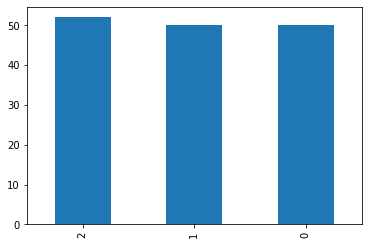

In [65]:
df['Species'].value_counts().plot(kind='bar')

### Plot the distribution of target variable using histogram

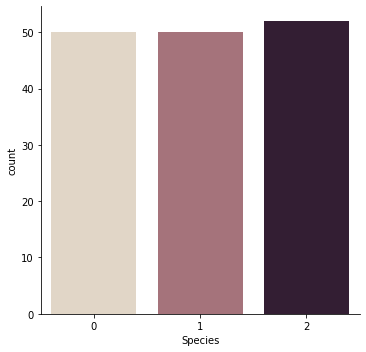

In [66]:
import seaborn as sns
sns.catplot(x="Species", kind="count", palette="ch:.25", data=df);

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

C:\Users\sumans\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\sumans\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


Sepal length vs Petal length and Petal Width are nicely separated for the three species with Iris Setosa having the least, similarly for Sepal Width


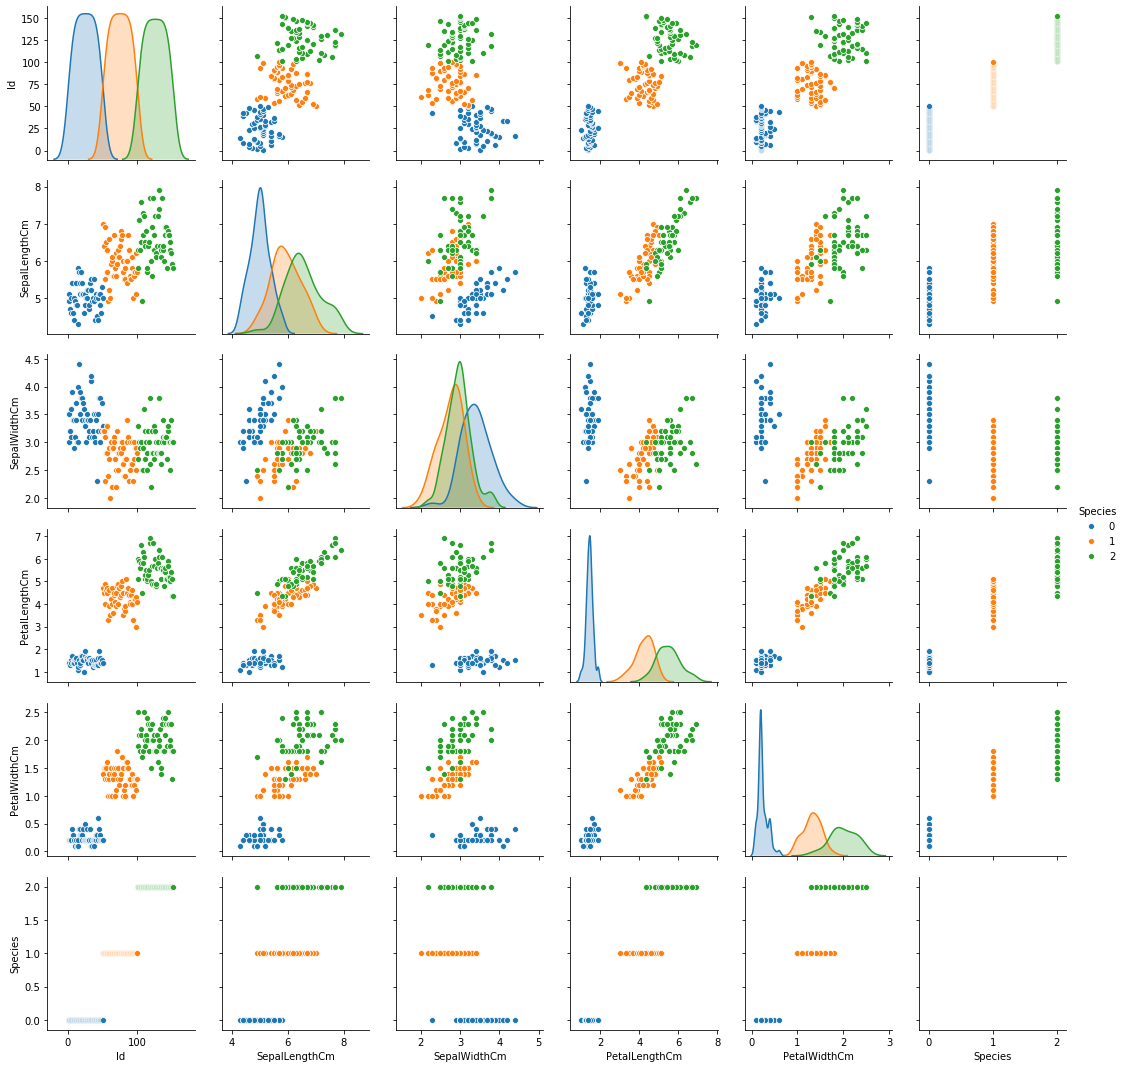

In [67]:
sns.pairplot(df,hue='Species')
print('Sepal length vs Petal length and Petal Width are nicely separated for the three species with Iris Setosa having the least, similarly for Sepal Width')

### Summary Statistics and explain insights for at least 2 variables

In [68]:
df.describe()
print('Petal length has the highest range')
print('Petal Width has outliers')

Petal length has the highest range
Petal Width has outliers


### Correlation among all variables and give your insights

In [69]:
df.corr()
print('Sepal length and PetalLength are highly corelated')
print('Petallength and PetalWidth are highly corelated')

Sepal length and PetalLength are highly corelated
Petallength and PetalWidth are highly corelated


### Split data in Training and Validation in 80:20

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=.8,random_state=1)

### Do Feature Scaling

In [71]:
from sklearn import preprocessing
sc = preprocessing.StandardScaler()
sc.fit(X_train)
scaledX_train = sc.transform(X_train)
scaledX_test = sc.transform(X_test)

### Train and Fit NaiveBayes Model

In [72]:
from sklearn.naive_bayes import GaussianNB
model  = GaussianNB()
model.fit(scaledX_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [73]:
outNB = model.predict(scaledX_test)

### Print Accuracy and Confusion Matrix and Conclude your findings

In [75]:
from sklearn.metrics import accuracy_score
print("Accuracy for NaiveBayes Model: " + str(accuracy_score(y_test, outNB)*100)+"%")

Accuracy for NaiveBayes Model: 100.0%


In [78]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, outNB,))

[[10  0  0]
 [ 0 13  0]
 [ 0  0  8]]


In [77]:
print('Not sure how, but I am getting 100% accuracy :')

Not sure how, but I am getting 100% accuracy :
